In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from package import euklid_regressor as eu
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [2]:
yahoo_df = pd.read_csv('../data/BTC.csv')

In [3]:
yahoo_df = yahoo_df[["Close",'SO',
                       'RSI_1', 
                    'RSI_2',
                    'RSI_3',
                    'RSI_14', 
                    '1 Day ROI', 
                    '2 Day ROI',
                       '3 Day ROI', 
                    'MACD_12_26_9',
                    'MACDh_12_26_9', 
                    'MACDs_12_26_9',
                     "Previous_differenced",
                    "Differenced"]]
price = yahoo_df['Differenced'] 
close = yahoo_df['Close']
yahoo_df

,Close,SO,RSI_1,RSI_2,RSI_3,RSI_14,1 Day ROI,2 Day ROI,3 Day ROI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
0,327.062012,0.000000,5.609768,10.299756,13.350601,32.532451,-0.052941,-0.069874,-0.058478,-8.046847,-3.686460,-4.360386,-0.017879,-0.052941
1,319.776001,0.000000,3.469386,7.456941,10.373527,30.310118,-0.022277,-0.074039,-0.090595,-10.013836,-4.522760,-5.491076,-0.052941,-0.022277
2,311.395996,0.000000,1.847709,5.051526,7.730101,27.956716,-0.026206,-0.047899,-0.098305,-12.109297,-5.294577,-6.814720,-0.022277,-0.026206
3,317.842987,9.849049,42.908428,30.808121,26.850732,32.290189,0.020704,-0.006045,-0.028187,-13.098752,-5.027226,-8.071527,-0.026206,0.020704
4,329.955994,29.137029,77.802607,60.787050,51.847908,39.603477,0.038110,0.059603,0.031835,-12.758414,-3.749509,-9.008904,0.020704,0.038110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,30101.265625,10.824275,70.958574,46.498772,36.749670,30.683438,0.027940,0.036268,0.040258,-2966.248122,-651.389194,-2314.858928,0.008102,0.027940
2707,31305.113281,22.010355,89.202858,68.431481,55.166004,35.843737,0.039993,0.069050,0.077712,-2840.874322,-420.812316,-2420.062007,0.027940,0.039993
2708,29862.917969,8.609563,35.607218,39.403873,37.653809,32.717422,-0.046069,-0.007918,0.019800,-2825.319270,-324.205811,-2501.113459,0.039993,-0.046069
2709,30425.857422,13.840362,56.167032,51.459469,46.493760,35.085322,0.018851,-0.028087,0.010783,-2736.028041,-187.931666,-2548.096376,-0.046069,0.018851


In [4]:
# convert series to supervised learning
values = yahoo_df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
values

array([[ 3.2706201e+02,  0.0000000e+00,  5.6097679e+00, ...,
        -4.3603864e+00, -1.7879453e-02, -5.2941229e-02],
       [ 3.1977600e+02,  0.0000000e+00,  3.4693859e+00, ...,
        -5.4910765e+00, -5.2941229e-02, -2.2277154e-02],
       [ 3.1139600e+02,  0.0000000e+00,  1.8477088e+00, ...,
        -6.8147206e+00, -2.2277154e-02, -2.6205860e-02],
       ...,
       [ 2.9862918e+04,  8.6095629e+00,  3.5607216e+01, ...,
        -2.5011135e+03,  3.9993256e-02, -4.6069000e-02],
       [ 3.0425857e+04,  1.3840363e+01,  5.6167030e+01, ...,
        -2.5480964e+03, -4.6069000e-02,  1.8850785e-02],
       [ 2.8720271e+04,  0.0000000e+00,  1.9138636e+01, ...,
        -2.5926670e+03,  1.8850785e-02, -5.6057122e-02]], dtype=float32)

# Train, test, val

In [5]:
X =  yahoo_df[[  'SO',
                       'RSI_1', 'RSI_2', 'RSI_3', 'RSI_14', '1 Day ROI', '2 Day ROI',
                       '3 Day ROI', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
                     "Previous_differenced",
                    ]]

y = yahoo_df["Differenced"]

In [6]:
# Split in 80/20 the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,shuffle=False)
close_train, close_test = train_test_split(close,test_size = 0.20, shuffle=False)

close_train, close_test = list(close_train), list(close_test) 

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(y_train.shape)

(2168, 1, 12)
(2168,)


# LSTM

In [9]:
model = Sequential()
model.add(LSTM(75, return_sequences=False))
model.add(Dropout(0.2))
#model.add(Dense(40))
model.add(Dense(1))

In [ ]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'loss', patience = 70)
# Set the optimizer
opt = tf.optimizers.SGD(learning_rate = 0.001)
#design network
batch_size = int(round(X_train.shape[0]*0.1))
# fit network
model.compile(loss='mae', optimizer=opt)
history = model.fit(X_train, y_train, epochs=2000, batch_size= batch_size, verbose=1,
    shuffle=False, validation_split=0.10)

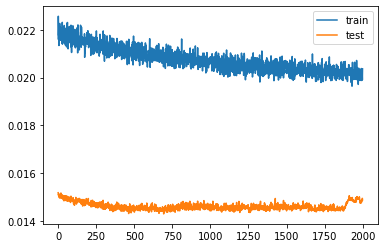

In [29]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:
# Save model for later use
path = 'C://users/valer/LSTM_saved_model' 
model.save(path)

INFO:tensorflow:Assets written to: C://users/valer/LSTM_saved_model/assets


INFO:tensorflow:Assets written to: C://users/valer/LSTM_saved_model/assets


# Prediction 

In [10]:
from keras.models import load_model
model = load_model('C://users/valer/LSTM_saved_model')
predict = model.predict(X_test)
predict = [float(predict[i]) for i in range(len(predict))]
pred = eu.scale_back_pct(predict, close_test)
updown_pred = eu.ud_pred(pred, close_test)

17/17 [==============================] - 0s 1ms/step


In [11]:
df = pd.DataFrame(updown_pred)
df["Close"] = list(close_test)
df["updown_pred"] = df.iloc[:,0]
df["updown_actual"] = eu.ud(close_test)
df["Scaled_pred"] = pred
df["Pred"] = predict
df = df.iloc[:,1:] 
acc = (df["updown_pred"] == df["updown_actual"]).sum()/df.shape[0]
print('Model Accuracy: ', acc)

Model Accuracy:  0.6224677716390423


In [12]:
df.tail(21)

,Close,updown_pred,updown_actual,Scaled_pred,Pred
522,39773.828125,0,1,39123.937991,-0.002986
523,38609.824219,0,0,39151.138629,-0.015656
524,37714.875000,0,0,37383.995630,-0.031749
525,38469.093750,0,1,37508.735462,-0.005466
526,38529.328125,0,1,38283.708280,-0.004819
527,37750.453125,0,0,37432.099954,-0.028478
528,39698.371094,1,1,37870.042127,0.003168
529,36575.140625,0,0,38691.479490,-0.025364
530,36040.921875,0,0,35347.006620,-0.033578
531,35501.953125,0,0,34401.019684,-0.045501


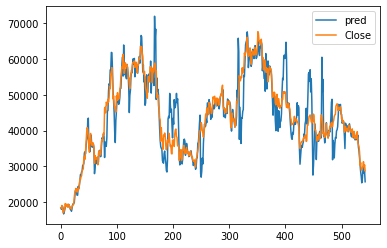

In [13]:
plt.plot(df['Scaled_pred'], label='pred')
plt.plot(df["Close"], label='Close')
plt.legend()
plt.show()

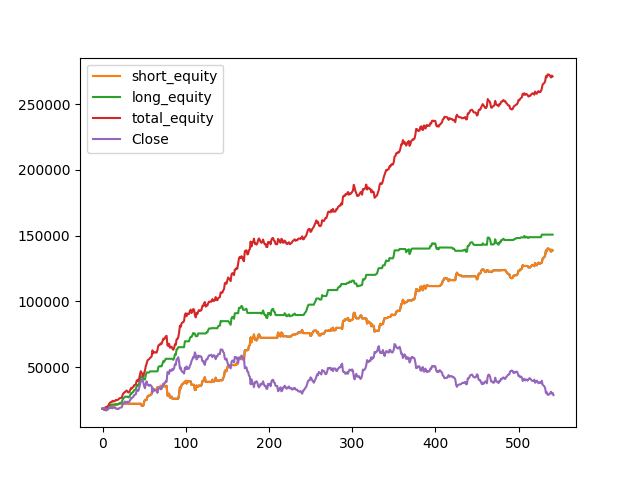

In [14]:
%matplotlib widget
df_equity = pd.DataFrame()
df_equity["long_equity"] = eu.long_equity(df["updown_pred"], df["Close"])
df_equity["short_equity"] = eu.short_equity(df["updown_pred"], df["Close"])
df_equity["total_equity"] = eu.total_equity(df["updown_pred"], df["Close"])
plt.plot(np.array(df_equity.index), df_equity["short_equity"])
df_equity["short_equity"].plot()
df_equity["long_equity"].plot()
df_equity["total_equity"].plot()
df["Close"].plot()
# df["Pred"].shift(-1).plot()
plt.legend()
plt.show()

In [35]:
df_equity

,long_equity,short_equity,total_equity
0,18370.001953,18370.001953,18370.001953
1,18370.001953,18375.882812,18375.882812
2,18370.001953,17632.539062,17632.539062
3,18370.001953,18007.882812,18007.882812
4,18370.001953,19589.380859,19589.380859
...,...,...,...
537,150773.884766,139860.783203,272264.666016
538,150773.884766,139042.621094,271446.503906
539,150773.884766,137838.773438,270242.656250
540,150773.884766,139280.968750,271684.851562


# Trading report

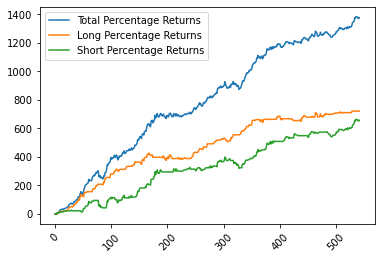

In [36]:
#dates = pd.to_datetime(yahoo_df['Date'].iloc[n_val_days+1:].reset_index()['Date'])
df_equity['percentage_total_return'] = eu.percentage_returns(df_equity['total_equity'])
df_equity['percentage_long_return'] = eu.percentage_returns(df_equity['long_equity'])
df_equity['percentage_short_return'] = eu.percentage_returns(df_equity['short_equity'])
df_equity['percentage_total_return_for_dd'] = eu.percentage_returns_for_dd(df_equity['total_equity'])
df_equity['percentage_long_return_for_dd'] = eu.percentage_returns_for_dd(df_equity['long_equity'])
df_equity['percentage_short_return_for_dd'] = eu.percentage_returns_for_dd(df_equity['short_equity'])
df_equity['updown_actual'] = df['updown_actual']
df_equity["updown_pred"] = df["updown_pred"]
plt.plot( df_equity['percentage_total_return'], label = 'Total Percentage Returns')
plt.plot( df_equity['percentage_long_return'], label = 'Long Percentage Returns')
plt.plot( df_equity['percentage_short_return'], label = 'Short Percentage Returns')
plt.xticks(rotation=45)
plt.legend()   
plt.show()

In [37]:
 eu.max_drawdown(df_equity['percentage_total_return_for_dd'])

[39.332399428184004, 3.94224600018398, 0.008072157428443916]

In [38]:
print('Max drawdown: ', eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[0], '%')  
print('Average drwadown: ', eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[1], '%')
print('Number of days a long position was held: ', eu.long_short_market_time(df_equity['updown_pred'])[0])       
print('Number of days a short position was held: ', eu.long_short_market_time(df_equity['updown_pred'])[1]) 

Max drawdown:  39.332399428184004 %
Average drwadown:  3.94224600018398 %
Number of days a long position was held:  236
Number of days a short position was held:  306


In [ ]:
total_short = eu.number_of_trades(df_equity['short_equity'],df_equity['updown_pred'])
winning_short = eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[0]
total_long = eu.number_of_trades(df_equity['long_equity'],df_equity['updown_pred'])
winning_long = eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[0]

print('Total number of trades: ', eu.number_of_trades(df_equity['total_equity'],df_equity['updown_pred']))
print('Average profit per trade: ', df_equity['percentage_total_return'][len(df_equity)-1]/(total_short + total_long))

print('#####################')
print('### SHORT RESULTS ###')
print('#####################')
print('\n')
print('Number of short trades: ', eu.number_of_trades(df_equity['short_equity'],df_equity['updown_pred']))
print('Number of winning short trades: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[0])
print('Win ratio: ', winning_short/total_short)
print('Short trades average loss: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[2])
print('Short trades average profit: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[1])
print('Short trades profit/loss ratio: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[3])
print('Short trades best profit: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[4])
print('Short trades worst loss: ', eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[5])
print('Short trades average % loss: ', eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[2], '%')
print('Short trades average % profit: ', eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[1], '%')
print('Short trades best % profit: ', eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[4], '%')
print('Short trades worst % loss: ', eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[5], '%')

print('\n')
print('####################')
print('### LONG RESULTS ###')
print('#####################')
print('\n')
print('Number of long trades: ', eu.number_of_trades(df_equity['long_equity'],df_equity['updown_pred']))
print('Number of winning long trades: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[0])
print('Win ratio: ', winning_long/total_long)
print('Long trades average loss: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[2])
print('Long trades average profit: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[1])
print('Long trades profit/loss ratio: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[3])
print('Long trades best profit: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[4])
print('Long trades worst loss: ', eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[5])
print('Long trades average % loss: ', eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[2], '%')
print('Long trades average % profit: ',eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[1], '%')
print('Long trades best % profit: ', eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[4], '%')
print('Long trades worst % loss: ', eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[5], '%')
# print('Totale trades average profit: ', number_of_trades(df_equity['total_equity'],df_equity['updown_pred'])[1])

In [ ]:
daily_yield = ((1+df_equity['percentage_total_return'][len(df_equity)-1]/100)**(1/len(df_equity))-1)*100
daily_yield
annualized_yield = (((1+daily_yield/100)**253)-1)*100
annualized_yield
print('Average compounded daily returns: ', daily_yield, ' %')
print('Average compounded annual returns: ', annualized_yield, ' %')
print('Max drawdown: ', eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[0], '%')  
print('Average drwadown: ', eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[1], '%')
print('Total period return: ', df_equity['percentage_total_return'][len(df_equity)-1], '%')

In [ ]:
returns = pd.DataFrame({'Total (375 days) %': [df_equity['percentage_total_return'][len(df_equity)-1]],
                       'Compounded Annual %' : [annualized_yield],
                       'Compounded Daily %': [daily_yield]}, index = None)

run_down = pd.DataFrame({'Maximum Drawdown %': [eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[0]],
                       'Average Drawdown %' : [eu.max_drawdown(df_equity['percentage_total_return_for_dd'])[1]]})

efficiency_long = pd.DataFrame({'Average Win %': [eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[1]],
                       'Average Loss %' : [eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[2]],
                        'Time at market (days)' : [long_short_market_time(df_equity['updown_pred'])[0]]})

efficiency_short = pd.DataFrame({'Average Win %': [eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[1]],
                       'Average Loss %' : [eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[2]],
                        'Time at market (days)' : [long_short_market_time(df_equity['updown_pred'])[1]]})

# efficiency_total = pd.concat({"Efficiency": efficiency_long}, axis=1, names=["l1", "l2"])

trade_analysis_long = pd.DataFrame({'Total trades': [eu.number_of_trades(df_equity['long_equity'],df_equity['updown_pred'])],
                                   'Positive': [eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[0]],
                                   'Negative': [eu.number_of_trades(df_equity['long_equity'],df_equity['updown_pred'])-eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[0]],
                                    'Positive trades %': [eu.number_of_winning_long_trades(df_equity['long_equity'],df_equity['updown_pred'])[0]/eu.number_of_trades(df_equity['long_equity'],df_equity['updown_pred'])*100],
                                   'Best Profit %': [eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[4]],
                                   'Worst Loss %': [eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[5]],
                                   'Average Profit/Loss ratio': [eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[1]/eu.number_of_winning_long_trades(df_equity['percentage_long_return_for_dd'],df_equity['updown_pred'])[2]]})

trade_analysis_short = pd.DataFrame({'Total trades': [eu.number_of_trades(df_equity['short_equity'],df_equity['updown_pred'])],
                                   'Positive': [eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[0]],
                                   'Negative': [eu.number_of_trades(df_equity['short_equity'],df_equity['updown_pred'])-eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[0]],
                                    'Positive trades %': [eu.number_of_winning_short_trades(df_equity['short_equity'],df_equity['updown_pred'])[0]/eu.number_of_trades(df_equity['short_equity'],df_equity['updown_pred'])*100],
                                   'Best Profit %': [eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[4]],
                                   'Worst Loss %': [eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[5]],
                                   'Average Profit/Loss ratio': [eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[1]/eu.number_of_winning_short_trades(df_equity['percentage_short_return_for_dd'],df_equity['updown_pred'])[2]]})

efficiency_total = pd.concat({"Long" : efficiency_long, "Short" : efficiency_short})

trade_analysis_total = pd.concat({"Long" : trade_analysis_long, "Short" : trade_analysis_short})
                                
final = pd.concat({"Returns" : returns,"Run Down": run_down,"Efficiency long": efficiency_long, "Efficiency short": efficiency_short, "Trade Analysis Long": trade_analysis_long, "Trade Analysis Short": trade_analysis_short}, axis=1)

In [ ]:
final.to_csv('../data/Report_BTC.xls')